In [1]:
!pip install --upgrade tensorflow==1.15

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
def apply_pca(normalize_dataset):
  pca = PCA(n_components=3)
  pca = pca.fit(normalize_dataset)
  pca_result = pca.transform(normalize_dataset)
  return pca_result

In [4]:
def get_distance(a,b):
  return tf.sqrt(tf.reduce_mean((a - b) ** 2, axis = 1)) 

In [5]:
class SOM:
  def __init__(self,width,height, nfeature, lr):
    self.width = width
    self.height = height
    self.nfeature = nfeature
    self.lr = lr

    self.weight = tf.Variable(tf.random.normal([width*height, nfeature]), tf.float32)

    self.input = tf.placeholder(tf.float32,[nfeature])

    self.location = []
    for y in range(height):
      for x in range(width):
        self.location.append(tf.cast([y,x],tf.float32))

    self.cluster = [[] for i in range(height)]

    self.bmu = self.get_bmu()
    self.update = self.update_neighbor()

  def get_bmu(self):
    distance = get_distance(self.input,self.weight)
    bmu_index = tf.argmin(distance)
    bmu_location = tf.cast([tf.div(bmu_index,self.width),tf.mod(bmu_index, self.width)], tf.float32)

    return bmu_location
  
  def update_neighbor(self):
    distance = get_distance(self.bmu,self.location)

    sigma = tf.cast(tf.maximum(self.width, self.height) / 2, tf.float32)

    neighbor_strength = tf.exp(-(distance ** 2) / (2 * sigma ** 2))
    rate = neighbor_strength * self.lr
    
    stacked_rate = []
    for i in range(self.width * self.height):
      stacked_rate.append(tf.tile([rate[i]],[self.nfeature]))

    delta = (stacked_rate * (self.input - self.weight))
    new_weight = self.weight + delta

    return tf.assign(self.weight, new_weight)

  def train(self, dataset, epoch):
    with tf.Session() as sess:
      sess.run(tf.global_variables_initializer())

      for epoch in range(epoch):
        print('epoch {} : '.format(epoch), end = '')
        for data in dataset:
          dic = {
              self.input : data
          }
          sess.run(self.update, feed_dict = dic)
        print('done')

      location = sess.run(self.location)
      weight = sess.run(self.weight)

      for i, loc in enumerate(location):
        self.cluster[int(loc[0])].append(weight[i])

In [6]:
df = pd.read_csv('./clustering.csv')

In [7]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,4,1,p,e,3,2,2,7,7,p,2,1,4,2,s,u
1,e,x,s,9,1,a,e,2,2,2,7,7,p,2,1,4,3,n,g
2,e,b,s,8,1,l,e,2,2,2,7,7,p,2,1,4,3,n,m
3,p,x,y,8,1,p,e,3,2,2,7,7,p,2,1,4,2,s,u
4,e,x,s,3,0,n,t,3,2,2,7,7,p,2,1,0,3,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,e,b,s,9,1,a,e,2,2,2,7,7,p,2,1,4,3,n,m
496,e,f,f,8,0,n,t,3,0,2,7,7,p,2,1,0,3,a,g
497,e,f,y,4,1,a,e,4,2,3,7,7,p,2,1,4,3,s,g
498,e,x,y,8,1,a,e,2,2,2,7,7,p,2,1,4,3,s,g


In [8]:
convertodor = { "a":1,
  "l":2,
  "c":3,
  "y":4,
  "f":5,
  "m":6,
  "n":7,
  "p":8,
  "s":9
}
df["odor"] = df["odor"].map(convertodor)

convertstalk = { "e":1,
  "t":2
}
df["stalk-shape"] = df["stalk-shape"].map(convertstalk)

convertveil = { "p":1,
  "u":2
}
df["veil-type"] = df["veil-type"].map(convertveil)

In [9]:
x = df[['bruises','odor', 'stalk-shape', 'veil-type','spore-print-color']]

In [10]:
x = StandardScaler().fit_transform(x)

In [11]:
x = apply_pca(x)

som = SOM(2,1,3,0.1)

som.train(x, 2500)

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
epoch 0 : done
epoch 1 : done
epoch 2 : done
epoch 3 : done
epoch 4 : done
epoch 5 : done
epoch 6 : done
epoch 7 : done
epoch 8 : done
epoch 9 : done
epoch 10 : done
epoch 11 : done
epoch 12 : done
epoch 13 : done
epoch 14 : done
epoch 15 : done
epoch 16 : done
epoch 17 : done
epoch 18 : done
epoch 19 : done
epoch 20 : done
epoch 21 : done
epoch 22 : done
epoch 23 : done
epoch 24 : done
epoch 25 : done
epoch 26 : done
epoch 27 : done
epoch 28 : done
epoch 29 : done
epoch 30 : done
epoch 31 : done
epoch 32 : done
epoch 33 : done
epoch 34 : done
epoch 35 : done
epoch 36 : done
epoch 37 : done
epoch 38 : done
epoch 39 : done
epoch 40 : done
epoch 41 : done
epoch 42 : done
epoch 43 : done
epoch 44 : done
epoch 45 : done
epoch 46 : done
epoch 47 : done
epoch 48 : done
epoch 49 : done
epoch 50 : done
epoch 51 : done
epoch 52 : done
epoch 53 : done
epoch 54 : done
epoch 55 : done
epoch 56 : done
epoch 57 : done
epoc

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


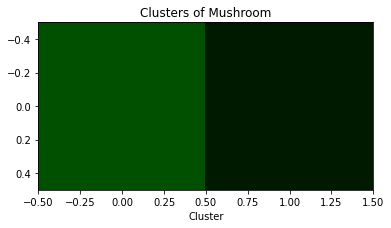

In [16]:
plt.title('Clusters of Mushroom')
plt.xlabel('Cluster')
plt.imshow(som.cluster)